In [28]:
import torch
import torchvision
import torchvision.transforms as transforms

In [29]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [32]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) 
        x = self.fc1(x)
        return x

net = Net()
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
trainloss=[]
trainaccuracy=[]
testloss=[]
testaccuracy=[]

In [33]:
for epoch in range(35):  # 25 epochs

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0


    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in trainloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = net(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')   
    trainaccuracy.append(100 * correct // total)

    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = net(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')
    testaccuracy.append(100 * correct // total)

print('Finished Training')

[1,  2000] loss: 2.189
[1,  4000] loss: 2.173
[1,  6000] loss: 2.144
[1,  8000] loss: 2.141
[1, 10000] loss: 2.158
[1, 12000] loss: 2.160
Accuracy of the network on the 10000 test images: 32 %
Accuracy of the network on the 10000 test images: 30 %
[2,  2000] loss: 2.062
[2,  4000] loss: 2.095
[2,  6000] loss: 2.125
[2,  8000] loss: 2.112
[2, 10000] loss: 2.146
[2, 12000] loss: 2.117
Accuracy of the network on the 10000 test images: 35 %
Accuracy of the network on the 10000 test images: 33 %
[3,  2000] loss: 2.058
[3,  4000] loss: 2.070
[3,  6000] loss: 2.081
[3,  8000] loss: 2.101
[3, 10000] loss: 2.063
[3, 12000] loss: 2.118
Accuracy of the network on the 10000 test images: 37 %
Accuracy of the network on the 10000 test images: 33 %
[4,  2000] loss: 2.025
[4,  4000] loss: 2.030
[4,  6000] loss: 2.102
[4,  8000] loss: 2.073
[4, 10000] loss: 2.088
[4, 12000] loss: 2.084
Accuracy of the network on the 10000 test images: 36 %
Accuracy of the network on the 10000 test images: 33 %
[5,  200

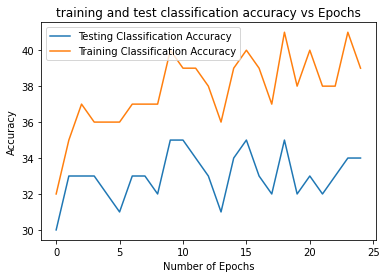

In [36]:
from matplotlib import pyplot as plt
plt.plot(testaccuracy,label='Testing Classification Accuracy')
plt.plot(trainaccuracy,label='Training Classification Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('training and test classification accuracy vs Epochs')
plt.legend()
plt.show()